<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Decision_Tree_C5_0_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [4]:
# import some data to play with
Fraud  = pd.read_csv('Fraud_check.csv')

In [5]:
Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
#Complete fraudFraudset
label_encoder = preprocessing.LabelEncoder()
Fraud['Undergrad'] = label_encoder.fit_transform(Fraud['Undergrad'])
Fraud['Marital.Status'] = label_encoder.fit_transform(Fraud['Marital.Status'])
Fraud['Urban'] = label_encoder.fit_transform(Fraud['Urban'])

In [7]:
Fraud.rename(columns = {'Marital.Status' : 'marital_status', 'Taxable.Income': 'tax_in', 'City.Population': 'city_popu',
                    'Work.Experience': 'work_exp'}, inplace= True)

In [8]:
Fraud.loc[Fraud["tax_in"]>=30000,"income"]="Good"
Fraud.loc[Fraud["tax_in"]<=30000,"income"]="Risky"

In [9]:
Fraud.drop(['tax_in'], axis=1, inplace=True)

In [10]:
Fraud['income']= label_encoder.fit_transform(Fraud['income']) 

In [11]:
Fraud

,Undergrad,marital_status,city_popu,work_exp,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [12]:
x=Fraud.iloc[:,0:5]
y=Fraud['income']

In [13]:
x

,Undergrad,marital_status,city_popu,work_exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: income, Length: 600, dtype: int64

In [15]:
Fraud.income.value_counts()

0    476
1    124
Name: income, dtype: int64

In [16]:
# Splitting Fraud into training and testing Fraud set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

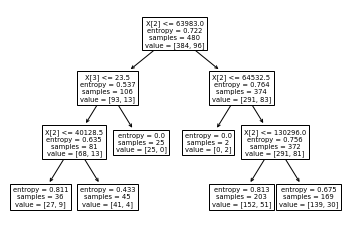

In [18]:
#PLot the decision tree
tree.plot_tree(model);


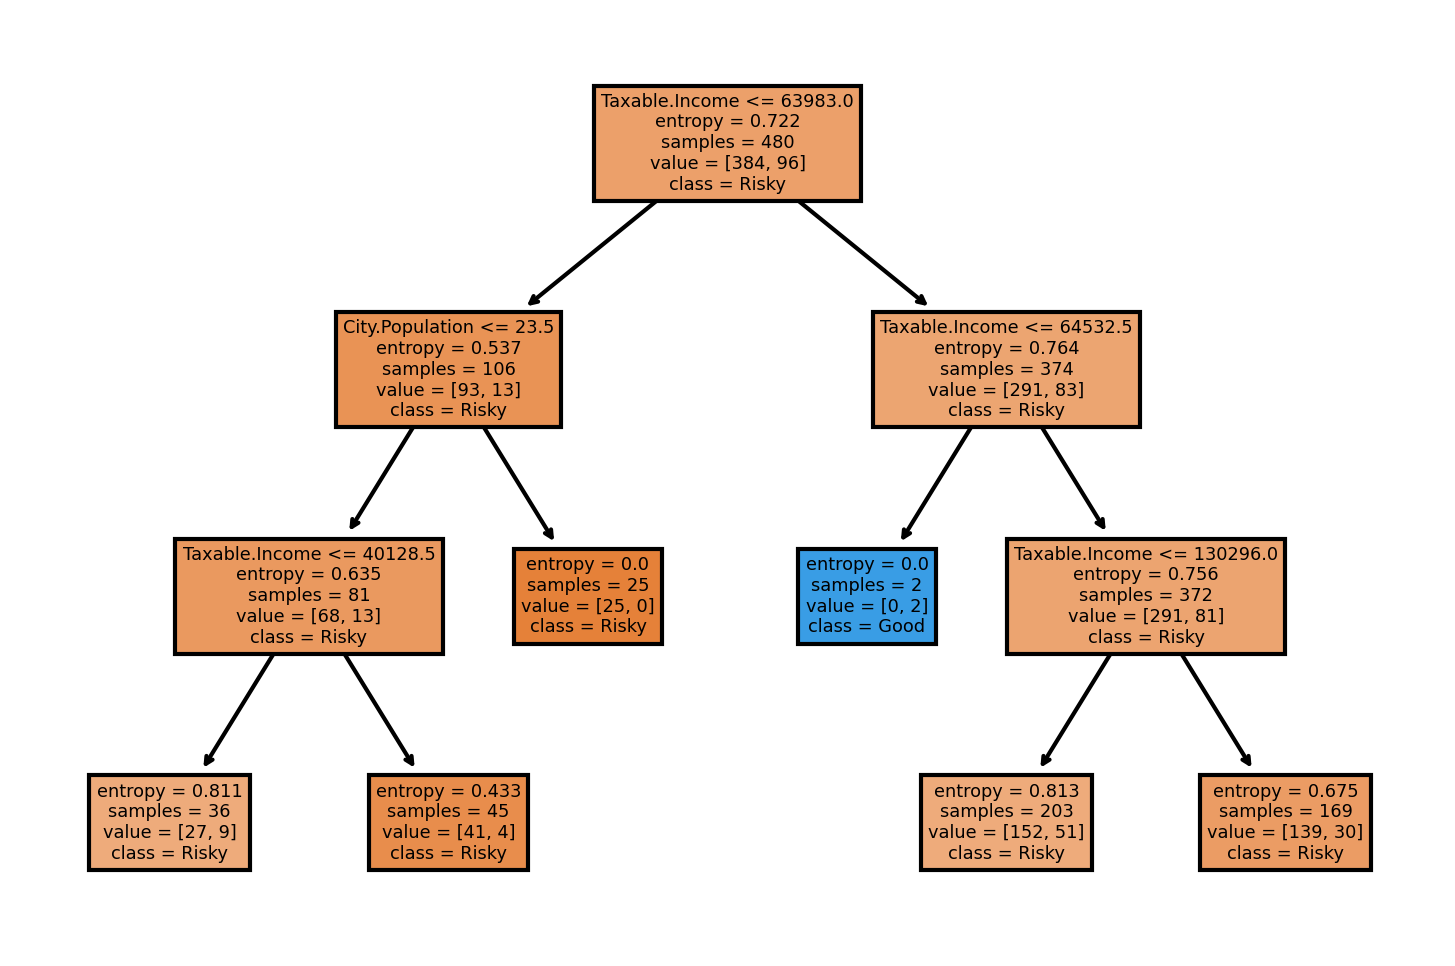

In [19]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize= (6,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names = cn,
               filled = True);

In [20]:
#Predicting on test Fraud
preds = model.predict(x_test) # predicting on test Fraud set 
pd.Series(preds).value_counts() # getting the count of each category 

0    120
dtype: int64

In [21]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0
income,
0,92
1,28


In [23]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

### Building Decision Tree Classifier (CART) using Gini Criteria

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [25]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667

#### Decision Tree Regression Example

In [27]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [32]:
array = Fraud.values
X = array[:,0:5]
y = array[:,5]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [34]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
#Find the accuracy
model.score(X_test,y_test)

-1.0990506329113927